# Grammar of Graphics <img src="images/JHI_STRAP_Web.png" style="width: 150px; float: right;">

<div class="alert alert-success">
<h2>Introduction</h2>
</div>

The *Grammar of Graphics* is a way of understanding the representation of data that differs from the 'traditional' way of thinking in terms of specific kinds of plot. It was pioneered by Leland Wilkinson in the early 2000s, but massively popularised, and very well explained, by Hadley Wickham and applied in the incredibly popular `ggplot` libraries in `R`.

* Hadley Wickham's ["A Layered Grammar of Graphics"](http://vita.had.co.nz/papers/layered-grammar.pdf)
* [Review](http://www.r-bloggers.com/the-grammar-of-graphics-l-wilkinson/) of "The Grammar of Graphics" (Wilkinson)
* `ggplot2`: [home page](http://ggplot2.org/)

The central premise of the *grammar of graphics* is data and its representation are handled separately. This allows for components of a plot to be customised easily to achieve a specific representation that allows you to explore and understand your data, or explains it to others, effectively.

If you are coming to the *grammar of graphics* for the first time, it can appear quite non-intuitive, but I hope you will see that it has many advantages over considering graphical representation in terms of archetypal 'types' of plot.

### Learning Outcomes

* Understand the Grammar of Graphics
* Use the Grammar of Graphics with the `ggplot` module to produce a scatterplot

<div class="alert alert-success">
<h2>Exercise</h2>
</div>

<div class="alert alert-success">
<h3>1. Producing a Basic Scatterplot</h3>
</div>

In this part of the exercise, you will produce a basic scatterplot of socioeconomic data, and work through understanding the elements of the plot and how they relate to the *grammar of graphics*.

#### Python imports

The `ggplot` Python module implements the *grammar of graphics* in a style similar to that used for `R`'s `ggplot2` library

* `ggplot` module: [project page](http://ggplot.yhathq.com/)

and we will use it for this exercise. 

<div class="alert alert-danger">
This module uses <b>matplotlib</b> as a backend, and if you are running in a virtual environment on OSX, it is likely that you will not have this installed as a Framework, so you will need to use the <b>%pylab inline</b> magic.
</div>

`ggplot` is intended to work well with the `DataFrame` representations of the `Pandas` module - a little like a reimplementation of `R`'s data philosophy in Python, so we also import this module. 

```python
%pylab inline

from ggplot import *

import pandas as pd
```

In [1]:
# Import ggplot and pandas modules
%pylab inline

from ggplot import *

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


#### Importing data

We will need some data to work with, and for this we will use data from the `R` package `gapminder`, which describes an excerpt of the Gapminder data on life expectancy, GDP per capita, and population by country.

* `gapminder` data: [R documentation](https://cran.r-project.org/web/packages/gapminder/index.html)
* `pandas`: [documentation](http://pandas.pydata.org/pandas-docs/stable/)

This is located under this repository's root directory in the `data` subdirectory in tab-separated tabular format, as `gapminder.tab`. We can import this to a DataFrame in the variable `gapminder` using `pandas`:

```python
gapminder = pd.read_csv("../../data/gapminder.tab", sep="\t")
```

In [2]:
# Import gapminder data into the variable gapminder
gapminder = pd.read_csv("../../data/gapminder.tab", sep="\t")

We can peek at the data in a `pandas` dataframe with the `.head()` method, which shows is the first few lines, along with header and row index information. The `.describe()` method will show summary information on the data in each column.

To see what data type each column holds, we can look at the `.dtypes` attribute of the dataframe

```python
gapminder.head()
gapminder.describe()
gapminder.dtypes
```

* ***QUESTION:*** What data is contained in the `gapminder` dataframe? How is it organised?
* ***QUESTION:*** What are the minimum and maximum values in each column?
*  ***QUESTION:*** What data types are `country`, `pop` and `lifeExp`? Why do you think these columns have these data types?

In [3]:
# Peek at the gapminder data
gapminder.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

#### The elements of a scatterplot

We can plot the data in `gapminder` using `ggplot` as though it were any other plotting library, just to render a basic scatterplot. We will do this by plotting life expectancy against GDP per capita with `ggplot`'s `qplot()` function. This emulates the `qplot()` function in `R`'s `ggplot2` library, but has this Python-specific difference:

* **dataframe variables must be provided as strings**

```python
qplot('lifeExp', 'gdpPercap', data=gapminder, color='continent')
```

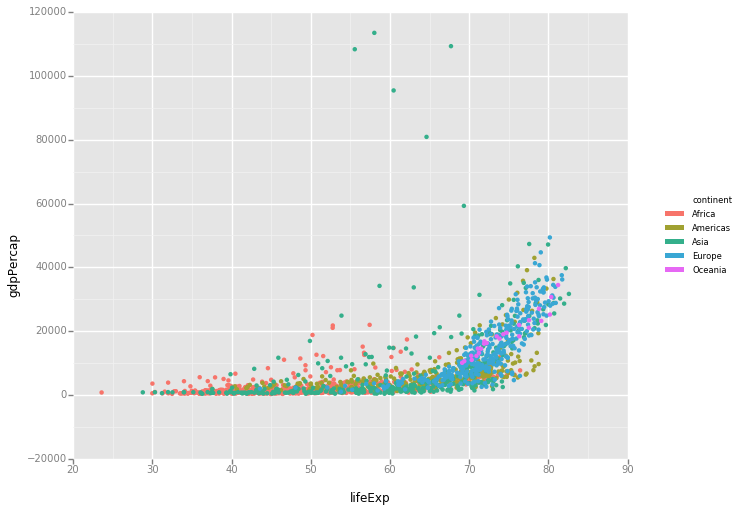

<ggplot: (281154168)>

In [4]:
# Use qplot to produce a basic scatterplot of gapminder data
qplot('lifeExp', 'gdpPercap', data=gapminder, color='continent')

<div class="alert alert-success">
<h3>2. Understanding a Scatterplot</h3>
</div>

It is likely that you can treat the scatterplot you have just produced quite intuitively. After all, you've probably seen a few scatterplots in your time.

The plot has *x*- and *y*- **axes**, and a large number of **points** plotted against those axes, indicating associations between life expectancy and GDP per capita for each point. The points are **coloured** according to the continent on which the datapoint was measured, and these colours are indicated in a **legend**. 

By quick visual inspection, we can see that the blue points (Europe) are associated with high life expectanct, and red points (Africa) a low life expectancy. So, this representation has value in summarising our large `gapminder` table, and allowing us to infer patterns in the data.

This convenience function (the default scatterplot) was quick and easy to draw, and informatics, but it's not very easy to modify or customise the representation. What if we'd like to build a plot *like* this, but different?

We're going to consider the plot elements (in **bold** above) in a little more detail, to break them down a bit in terms of the *grammar of graphics*, so we can build highly customisable plots to represent your data.

<div class="alert alert-success">
2a. **aesthetics**
</div>

Firstly, we note that every *observation* in the data is a single **point**. Each point has an *aesthetic* that determines how it is rendered in the plot. The *aesthetics* we can control are:

* *x*- and *y*- co-ordinate
* shape
* size
* colour

<div class="alert alert-warning">
<b>Each aesthetic can either be constant, or be mapped to a variable.</b>
</div>

Most obviously, the *x*- and *y*- co-ordinates are *mapped* to the variables `lifeExp` and `gdpPercap`, respectively. The *colour* aesthetic is mapped to the `continent` variable. 

These two mappings differ, because of the kind of variable being mapped:

* `lifeExp` and `gdpPercap` are continuous variables
* `continent` is a discrete variable

<div class="alert alert-warning">
<b>We could construct many different plots from exactly the same data, just by using different aesthetics</b>
</div>

For an arbitrary set of points, we could describe *x*-, *y*- and *colour* aesthetics as in the table below:

![scatterplot aesthetics](images/scatterplot_data_table.png)

This should remind you of a `DataFrame`, and with good reason: 

<div class="alert alert-warning">
<b>the mapping from <i>data</i> to an effective <i>visualisation</i> is in large part one of making an appropriate choice of <i>aesthetics</i></b>
</div>

*Aesthetics* essentially create a new dataset that corresponds to your original data, but that contains aesthetic information. Building a plot involves creating *mappings* from your data to produce values in this *aesthetic* dataset.

<div class="alert alert-success">
2b. Geometric representations: <b>geom</b>s
</div>

Independently of the aesthetics described above, we can consider different ways of drawing a dataset:

* If we draw data with **points**, we have a **scatterplot**
* If we draw data with **lines**, we have a **line plot**
* If we draw data with **bars**, we have a **bar chart**

and so on.

These *types* of representation are referred to as *geometric representations*, or `geom`s, for short.

![Types of `geom`](images/geom_types.png)

* Not all `geom`s make sense for a given dataset, even though they may be "grammatical".
* It is possible to combine multiple `geom`s to produce new graphs

<div class="alert alert-success">
2c. <b>layers</b>
</div>

In the *grammar of graphics*, visualisations are built up as **layers**. Each layer has *at least* two parts:

1. *data* and its *aesthetic* mapping
2. a *geometric representation* (`geom`)

Additionally, each layer may also have optional statistical transformations or adjustments (e.g. scalings, or fitted curves).

<div class="alert alert-warning">
<b>The data in a layer may be provided in the layer itself or, more commonly, be provided in a <i>default dataset</i> that is in the base layer for the visualisation.</b>
</div>

<div class="alert alert-success">
2d. Recreating the scatterplot with <b>layers</b>
</div>

One approach to creating a plot with layers is first to create a *base layer* that contains the default dataset and defines *aesthetics* for it, and then to add additional layers that provide *geometric representations*. We will do this now to reproduce the scatterplot you drew above.

#### Base layer

We create a base layer as an instance of the `ggplot()` Class, and assign it to a variable `p`. The `ggplot()` is created with `gapminder` as the dataset, and with *aesthetics* that map the `lifeExp` and `gdpPercap` continuous variables to the *x*- and *y*- co-ordinates, respectively.

```python
p = ggplot(gapminder, aes(x='lifeExp', y='gdpPercap'))
```

<div class="alert alert-warning">
<b>NOTE:</b> This does not have quite the same syntax as its <b>R</b> equivalent.
</div>

In [5]:
# Create the plot base layer
p = ggplot(gapminder, aes(x='lifeExp', y='gdpPercap', color='continent'))

#### First `geom` layer

You will notice that, although you have created a base layer, there is no plot visible. This is in part because no geometric representation has been defined and, without this representation of the data, there is nothing to be drawn.

To produce a figure, we *add* a `geom` to the base layer in `p`:

```python
p + geom_point()
```

<div class="alert alert-warning">
<b>NOTE:</b> This does not have quite the same syntax or behaviour as its <b>R</b> equivalent. In particular, it is not possible (in <b>ggplot v0.10.4</b>) to define a new aesthetic in this layer.
</div>

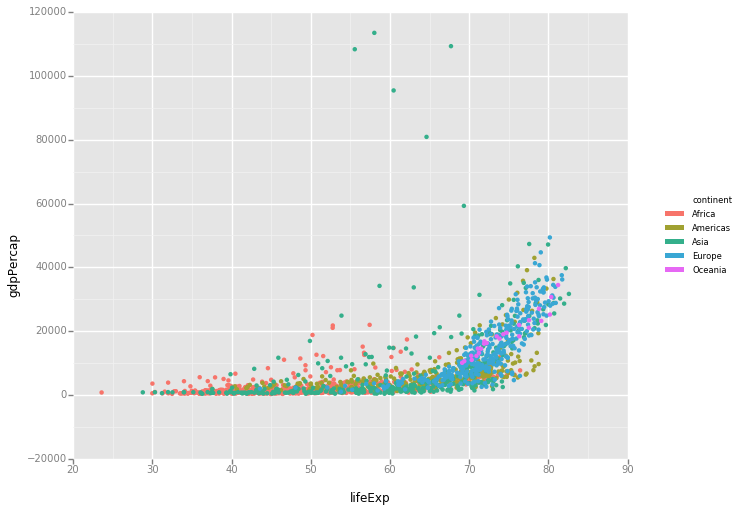

<ggplot: (281518123)>

In [6]:
# Use a geom_point() to produce a scatterplot
p + geom_point()

This only temporarily changes the plot, as the base plot in `p` remains unchanged. To make a 'permanent' change to a base plot, and to show it in the notebook, we can use the code:

```python
p = ggplot(gapminder, aes(x='lifeExp', y='gdpPercap', color='continent'))
p += geom_point()
p
```

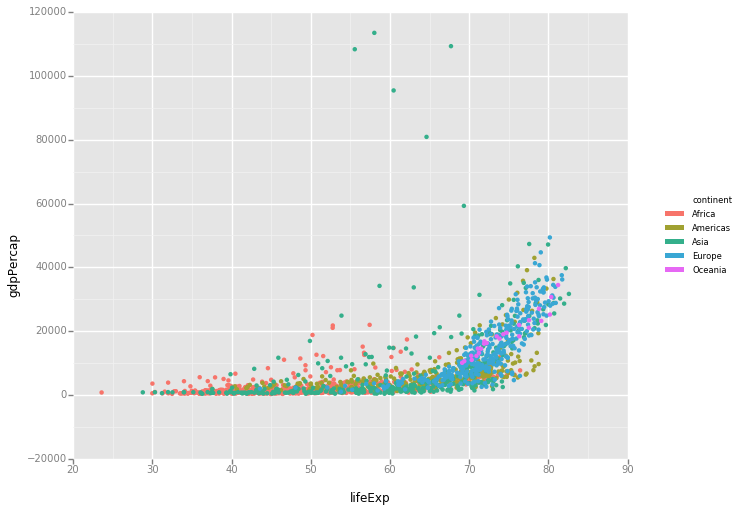

<ggplot: (-9223372036573236771)>

In [7]:
# Add the geom_point() to the base plot in p, and render the whole scatterplot
p = ggplot(gapminder, aes(x='lifeExp', y='gdpPercap', color='continent'))
p += geom_point()
p

This now matches our earlier effort, and we can continue to add new `geom`s to the plot to build up more information:

```python
p = ggplot(gapminder, aes(x='lifeExp', y='gdpPercap', color='continent'))
p += geom_point()
p += xlab("life expectancy")
p += ylab("GDP per capita")
p += title("gapminder example data")
p
```

<div class="alert alert-warning">
<b>NOTE:</b> This does not have the same syntax or behaviour as its <b>R</b> equivalent. In particular, it is not possible (in <b>ggplot v0.10.4</b>) to render a plot then continue to add layers to the plot.
</div>

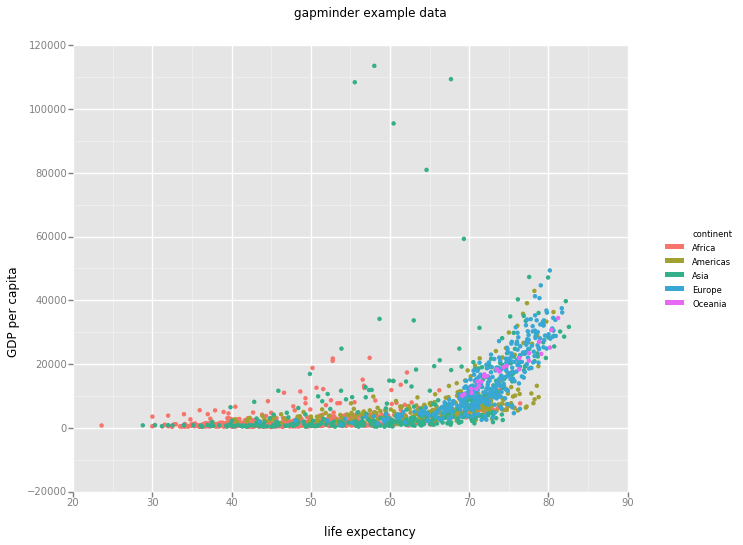

<ggplot: (281627547)>

In [8]:
# Add axis labels and a title to the plot
p = ggplot(gapminder, aes(x='lifeExp', y='gdpPercap', color='continent'))
p += geom_point()
p += xlab("life expectancy")
p += ylab("GDP per capita")
p += ggtitle("gapminder example data")
p

<div class="alert alert-success">
2e. Challenge
</div>

Can you modify the example above so that the figure visualises how life expectancy has changed over time, as a scatterplot?

```python
p = ggplot(gapminder, aes(x='year', y='lifeExp', color='continent'))
p += geom_point()
p += xlab("year")
p += ylab("life expectancy")
p += ggtitle("challenge 1")
p
```

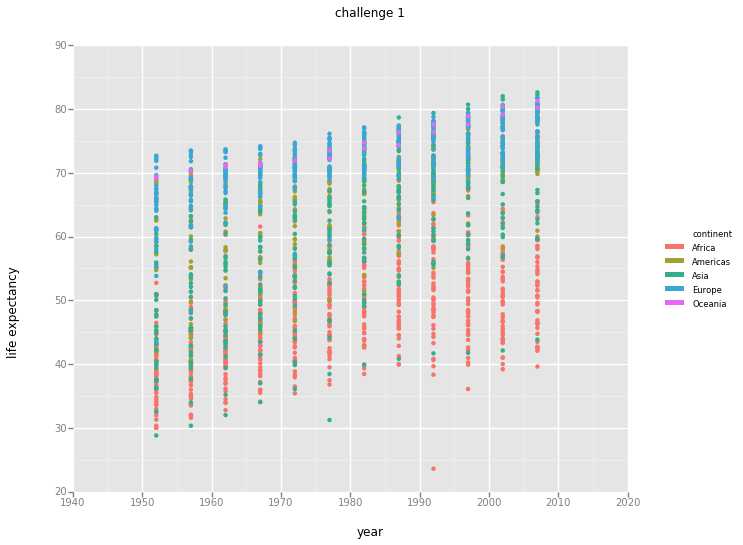

<ggplot: (282215407)>

In [9]:
# Answer challenge in this cell
p = ggplot(gapminder, aes(x='year', y='lifeExp', color='continent'))
p += geom_point()
p += xlab("year")
p += ylab("life expectancy")
p += ggtitle("challenge 1")
p